In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Wetterdaten einlesen

Dafür benutzen wir read_csv. CSV steht für "Comma Separated Values".

In [2]:
data = pd.read_csv("produkt_klima_tag_19510101_20150322_01957.txt", sep=";")
data.head()

STATIONS_ID  MESS_DATUM  QN_3     FX     FM  QN_4   RSK  RSKF    SDK  \
0         1957    19510101  -999 -999.0 -999.0     5   0.0     8 -999.0   
1         1957    19510102  -999 -999.0 -999.0     5   0.0     0 -999.0   
2         1957    19510103  -999 -999.0 -999.0     5  10.0     1 -999.0   
3         1957    19510104  -999 -999.0 -999.0     5   0.0     1 -999.0   
4         1957    19510105  -999 -999.0 -999.0     5   0.8     1 -999.0   

   SHK_TAG    NM   VPM      PM   TMK   UPM   TXK   TNK   TGK  eor  
0       16   6.2   4.5   988.2  -1.0  83.0   2.2 -19.4 -20.3  eor  
1       17   3.8   4.3   983.6  -3.2  87.0   2.0  -9.3 -13.0  eor  
2       14   7.8   5.1   993.5   0.2  85.0   2.0  -5.4  -7.5  eor  
3       13   6.4   5.3  1005.8   0.7  81.0   2.4  -1.6  -7.7  eor  
4       12   8.0   6.4  1001.8   3.0  86.0   4.4   0.0  -3.4  eor

In [3]:
# Um jetzt schön plotten zu können, tun wir zwei Dinge:
# 1) wir wandeln die Integers in der Spalte "MESS_DATUM", die in der Form 19510101 (stellvertretend für Jahr, Monat, Tag) auftreten
# in echte Datumsobjekte um
# 2) wir sagen Pandas, dass wir das Datum als unseren Default-Index benutzen möchten

data.MESS_DATUM =  pd.to_datetime(data.MESS_DATUM, format="%Y%m%d")
data = data.set_index("MESS_DATUM")

data.head()

STATIONS_ID  QN_3     FX     FM  QN_4   RSK  RSKF    SDK  SHK_TAG  \
MESS_DATUM                                                                      
1951-01-01         1957  -999 -999.0 -999.0     5   0.0     8 -999.0       16   
1951-01-02         1957  -999 -999.0 -999.0     5   0.0     0 -999.0       17   
1951-01-03         1957  -999 -999.0 -999.0     5  10.0     1 -999.0       14   
1951-01-04         1957  -999 -999.0 -999.0     5   0.0     1 -999.0       13   
1951-01-05         1957  -999 -999.0 -999.0     5   0.8     1 -999.0       12   

              NM   VPM      PM   TMK   UPM   TXK   TNK   TGK  eor  
MESS_DATUM                                                         
1951-01-01   6.2   4.5   988.2  -1.0  83.0   2.2 -19.4 -20.3  eor  
1951-01-02   3.8   4.3   983.6  -3.2  87.0   2.0  -9.3 -13.0  eor  
1951-01-03   7.8   5.1   993.5   0.2  85.0   2.0  -5.4  -7.5  eor  
1951-01-04   6.4   5.3  1005.8   0.7  81.0   2.4  -1.6  -7.7  eor  
1951-01-05   8.0   6.4  1001.8   3.0  86.0   4.4   0.0  -3.4  eor

Die Spalten sind zur Zeit nicht sehr aussagekräftig. Auf der Webseite des DWD wird aber erklärt, für was die Kürzel
stehen (ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/climate/daily/kl/historical/BESCHREIBUNG_obsgermany_climate_daily_kl_historical_de.pdf)

Wir geben den Spalten nun bessere Namen

In [4]:
data.columns = ["id", "quali1", "windspitze_max", "windgeschwindigkeit_mittel", "quali2", 
                "niederschlagshöhe", "niederschlagsform", "sonnenscheindauer", "schneehöhe", "bedeckungsgrad",
                "dampfdruck", "luftdruck", "temperatur", "relative_feuchte", "temperatur_max", "temperatur_min",
                "bodentemperatur", "eor"]

# Jetzt können wir noch die letzte Spalte eor löschen, die keine Information liefert
del data["eor"]
data.columns

Index(['id', 'quali1', 'windspitze_max', 'windgeschwindigkeit_mittel',
       'quali2', 'niederschlagshöhe', 'niederschlagsform', 'sonnenscheindauer',
       'schneehöhe', 'bedeckungsgrad', 'dampfdruck', 'luftdruck', 'temperatur',
       'relative_feuchte', 'temperatur_max', 'temperatur_min',
       'bodentemperatur'],
      dtype='object')

In [5]:
# Wenn wir uns nun die Lufttemperatur ausgeben lassen, wird als Index automatisch das Datum der Messung angezeigt
data.temperatur.tail()

MESS_DATUM
2015-03-18    8.4
2015-03-19    5.3
2015-03-20    4.3
2015-03-21    2.5
2015-03-22    1.6
Name: temperatur, dtype: float64

## Daten filtern

In [6]:
# Nun sortieren wir die Daten etwas aus. Oft gibt es fehlerhafte Daten, bei denen die Temperatur auf -999 gesetzt ist

data_good = data.query('temperatur > -50')

count    23142.000000
mean         9.353379
std          7.640788
min        -19.900000
25%          3.700000
50%          9.600000
75%         15.400000
max         30.100000
Name: temperatur, dtype: float64


/scratch/kabbe/programs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


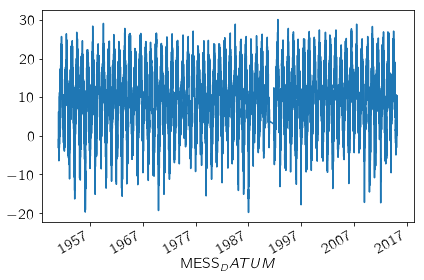

In [7]:
# Die gesäuberten Daten können wir nun leicht plotten
# Da wir das Messdatum als Index ausgewählt haben, benutzt Pandas es automatisch als x-Achse
print(data_good.temperatur.describe())
data_good.temperatur.plot()
plt.show()

## Daten gruppieren

Diesmal wollen wir herausfinden, wieviel Schnee im Durchschnitt in jedem Monat seit Beginn der
Aufzeichnungen gefallen ist.

In [8]:
snow = data[["schneehöhe"]] # hier die extra Klammer beachten. Dadurch bekommen wir wieder einen DataFrame
                            # statt einer Series

In [9]:
# hier fügen wir zusätzliche Spalten ein und nehmen nur die Tage, an denen vernünftige Werte gemessen wurden
snow_selection = (snow.assign(month = snow.index.month)
                      .query('schneehöhe >= 0'))

snow_selection.head()

schneehöhe  month
MESS_DATUM                   
1951-01-01          16      1
1951-01-02          17      1
1951-01-03          14      1
1951-01-04          13      1
1951-01-05          12      1

## Aufgaben

### Schneehöhe

* Benutzen Sie groupby, um snow_selection nach Monaten zu gruppieren

* Wenden Sie auf das resultierende Objekt .mean() an, um die mittlere Schneehöhe für jeden Monat zu erhalten



### Schneehöhe und Bodentemperatur

* Benutzen Sie data.query um wieder fehlerhafte Werte in den Spalten schneehöhe und bodentemperatur auszusortieren

* Erstellen Sie einen Scatterplot, auf dem die x-Achse die Bodentemperatur, und die y-Achse die Schneehöhe darstellt

### Temperaturverlauf

Plotten Sie den durchschnittlichen jährlichen Temperaturverlauf. 
Führen Sie dafür folgende Schritte durch:

* Selektieren Sie die Spalte temperatur

* fügen Sie mittels assign eine neue Spalte doy = data.index.dayofyear hinzu

* Benutzen Sie groupby("doy")

* Bestimmen Sie das Mittel

* Plotten Sie das Ergebnis



### Sonnenscheindauer

* Wiederholen Sie die obige Prozedur für die Sonnenscheindauer 

### Niederschlag und Temperatur

* Erstellen Sie einen Scatter-Plot für Niederschlag und Temperatur

* Erstellen Sie einen Scatter-Plot für Sonnenscheindauer und Temperatur